<a href="https://colab.research.google.com/github/luckycontrol/DeepLearning_tensorflow/blob/main/4_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
cancer = load_breast_cancer()

In [23]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# 트리 계열 알고리즘은 랜덤으로 질문지를 만드는 것이 아니다. ( 지니 계수라는 것을 이용 )
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [12]:
print("훈련 세트 정확도: {:.2f}".format(tree.score(x_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(tree.score(x_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.94


복잡도를 낮추기 위해 트리의 최대 길이 제한하기
* 사이킷런은 사전 가지치기 기법을 사용

In [13]:
# 범용적으로 max_depth를 사용하면 좋다.
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(tree.score(x_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(tree.score(x_test, y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.95


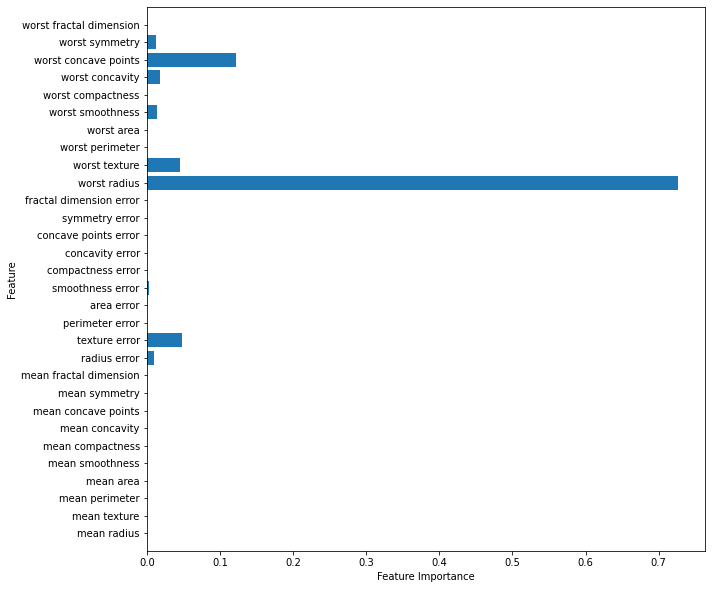

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)
plt.show()

feature_importance_ 의 값이 낮다고 해서 중요하지 않은 건 아니다.

단순히 모델이 선택을 안했을 수도 있기에~

랜덤포레스트

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [28]:
x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=f6e705142672e3d7d5ad933815c4b10acfc3dc386c86054f14724eecf83c1e51
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


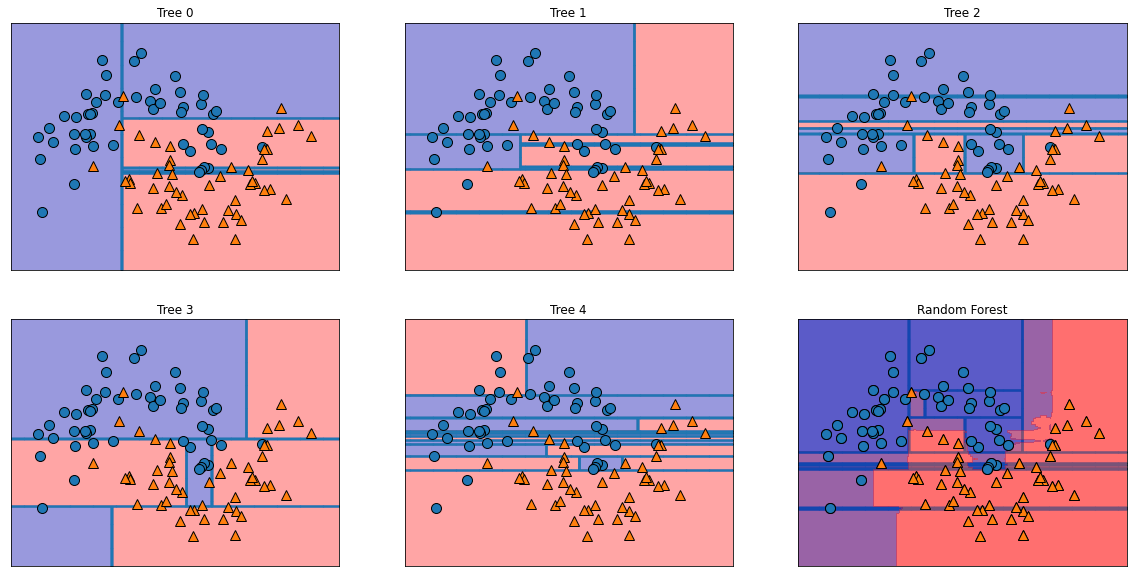

In [33]:
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, x, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)

유방암 데이터셋 사용하기

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
print('훈련 세트 점수: {:.2f}'.format(forest.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(forest.score(x_test, y_test)))

훈련 세트 점수: 1.00
테스트 세트 점수: 0.97


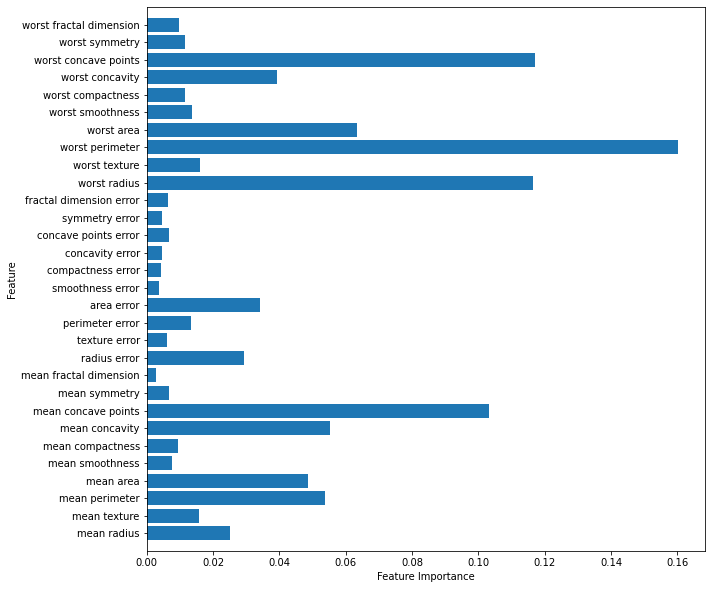

In [38]:
# 랜덤포레스트는 데이터 분석에도 쓴다.
# 랜덤포레스트를 이용해서 중요한 특성들을 파악할 수 있음. ( 데이터 마이닝 )
# 많은 데이터중에 소수만 뽑아서 데이터 마이닝을 하고싶을 때 랜덤 포레스트 사용.
plot_feature_importances_cancer(forest)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

print('훈련 세트 점수: {:.2f}'.format(gbrt.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(gbrt.score(x_test, y_test)))

훈련 세트 점수: 1.00
테스트 세트 점수: 0.97


In [43]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

print('훈련 세트 점수: {:.2f}'.format(gbrt.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(gbrt.score(x_test, y_test)))

훈련 세트 점수: 0.99
테스트 세트 점수: 0.97


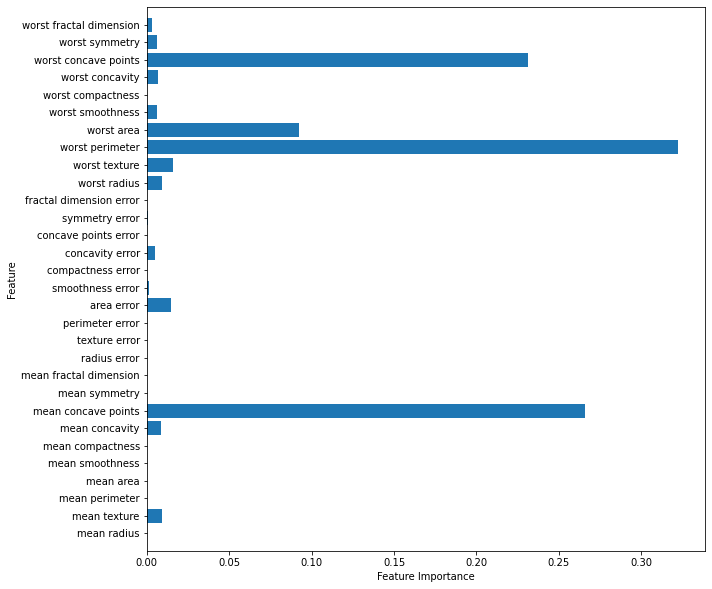

In [44]:
plot_feature_importances_cancer(gbrt)